# XGboost

## 1. What is boosting?

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

## 2. Explain the following three models: Adaboost, Gradient boost and XGboost (also discuss their similarities and differences)

Boosting algorithms can differ in how they create and aggregate weak learners during the sequential process. Three popular types of boosting methods include: 

1. Adaptive boosting or AdaBoost: Yoav Freund and Robert Schapire are credited with the creation of the AdaBoost algorithm. This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.  

2. Gradient boosting: Building on the work of Leo Breiman, Jerome H. Friedman developed gradient boosting, which works by sequentially adding predictors to an ensemble with each one correcting for the errors of its predecessor. However, instead of changing weights of data points like AdaBoost, the gradient boosting trains on the residual errors of the previous predictor. The name, gradient boosting, is used since it combines the gradient descent algorithm and boosting method.  

3. Extreme gradient boosting or XGBoost: XGBoost is an implementation of gradient boosting that’s designed for computational speed and scale. XGBoost leverages multiple cores on the CPU, allowing for learning to occur in parallel during training.  

Similarities : All of them combine number of weak learners to form a strong learner.


|S.No	| Adaboost |	Gradient Boost|
| --- | --- | --- |
|1|	An additive model where shortcomings of previous models are identified by high-weight data points.|	An additive model where shortcomings of previous models are identified by the gradient.|
|2|	The trees are usually grown as decision stumps.|	The trees are grown to a greater depth usually ranging from 8 to 32 terminal nodes.|
|3|	Each classifier has different weights assigned to the final prediction based on its performance.|	All classifiers are weighed equally and their predictive capacity is restricted with learning rate to increase accuracy.|
|4|	It gives weights to both classifiers and observations thus capturing maximum variance within data.|	It builds trees on previous classifier’s residuals thus capturing variance in data.|

##### XGBoost 
XGBoost is an advanced version of Gradient boosting method, it literally means eXtreme Gradient Boosting.
The main aim of this algorithm is to increase the speed and efficiency of computation. The Gradient Descent Boosting algorithm computes the output at a slower rate since they sequentially analyze the data set, therefore XGBoost is used to boost or extremely boost the performance of the model.

XGBoost is designed to focus on computational speed and model efficiency. The main features provided by XGBoost are:

- Parallelly creates decision trees.

- Implementing distributed computing methods for evaluating large and complex models.

- Using Out-of-Core Computing to analyze huge datasets.

- Implementing cache optimization to make the best use of resources.



## 3. What is a Dmatrix? 

DMatrix is an internal data structure that is used by XGBoost, which is optimized for both memory efficiency and training speed. You can construct DMatrix from multiple different sources of data.

## 4. Load the dataset attached with this HW (wholesale)

In [32]:
# importing required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris, load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import auc,accuracy_score,precision_recall_curve,recall_score,precision_score,ConfusionMatrixDisplay,roc_auc_score,confusion_matrix,r2_score,f1_score,precision_score,recall_score



In [33]:
data = pd.read_csv("wholesale-data.csv")

In [34]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [35]:
#Checking for null values
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [36]:
# Stats for continuous features 
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [37]:
# Number of classes for target variable
data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

## 5. Change the dataset into a dmatrix

In [38]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [39]:
# Converting the target variable Channel to string and then mapping it to 0 and 1. It is required for XGBoost
data['Channel'] = data['Channel'].astype(str)
data['Channel'] = data['Channel'].str.replace('1','0')
data['Channel'] = data['Channel'].str.replace('2','1')
data['Channel'] = data['Channel'].astype(int)

In [40]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,12669,9656,7561,214,2674,1338
1,1,3,7057,9810,9568,1762,3293,1776
2,1,3,6353,8808,7684,2405,3516,7844
3,0,3,13265,1196,4221,6404,507,1788
4,1,3,22615,5410,7198,3915,1777,5185


In [41]:
print('Number of unique values in Channel : ',data['Channel'].nunique())

Number of unique values in Channel :  2


In [42]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [43]:
data_f = xgb.DMatrix(data)

In [44]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [45]:
y_train.value_counts()

0    251
1    123
Name: Channel, dtype: int64

## 6. What is an imbalanced dataset?

Let us say we have a dataset of cancer patients to be used in predictive modelling, and based on some inputs, the model will predict whether a patient is diagnosed with cancer or is a healthy patient. The resulting value can be either called a class or target or dependent variables. As this is a classification problem, we will use 'class'. So, for this example, we have two class values as “Cancer” and “No Cancer”.

Let us suppose we have a dataset of 1000 patients, out of which 80 are cancer patients and the rest (920) are healthy. This is an example of an imbalanced dataset, as the majority class is about 9 times bigger than the minority class. Here the majority class is “No Cancer”, and minority class is “Cancer”. Such a dataset is called an Imbalanced Dataset.

So we define an imbalanced dataset as a dataset where the majority class is much larger than the minority class. There is no limit to how big the majority class has to be. Even when the majority class is twice the size of the minority class, it is still an imbalanced dataset.

## 7. perform classification with "channel" as the target variable and XGBoost as the model

In [46]:
# training the model
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

[18:48:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shreyahunur/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
# predicting for the training set and evaluating
y_train_pred = xgb_clf.predict(X_train)

## 8. Evaluate the model using accuracy, f1 score, AUROC and AUPRC and explain which one is the best evaluation metric for this model and why?

### Training data

In [48]:
y_train.value_counts()

0    251
1    123
Name: Channel, dtype: int64

Accuracy score : 1.00
Recall score : 1.00
Precision score : 1.00
F1 score : 1.00


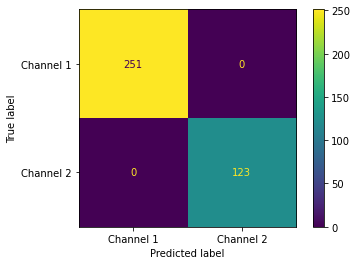

In [49]:
cm = confusion_matrix(y_train,y_train_pred)
print("Accuracy score : {:.2f}".format(accuracy_score(y_train_pred,y_train)))
print("Recall score : {:.2f}".format(recall_score(y_train_pred,y_train,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(y_train_pred,y_train,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(y_train_pred,y_train,zero_division=True)))
dis = ConfusionMatrixDisplay(cm,display_labels=["Channel 1","Channel 2"])
dis.plot()
plt.show()

### Test data

In [50]:
# predicting for the testing set and evaluating
y_test_pred = xgb_clf.predict(X_test)

In [51]:
y_test.value_counts()

0    47
1    19
Name: Channel, dtype: int64

Accuracy score : 0.91
Recall score : 0.88
Precision score : 0.95
F1 score : 0.86


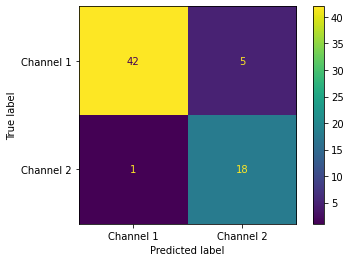

In [52]:
cm_test = confusion_matrix(y_test,y_test_pred)
print("Accuracy score : {:.2f}".format(accuracy_score(y_test_pred,y_test)))
print("Recall score : {:.2f}".format(recall_score(y_test_pred,y_test,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(y_test_pred,y_test,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(y_test_pred,y_test,zero_division=True)))
dis = ConfusionMatrixDisplay(cm_test,display_labels=["Channel 1","Channel 2"])
dis.plot()
plt.show()

### AUROC 

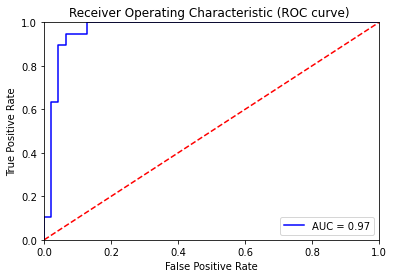

In [53]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (ROC curve) ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### AUPRC

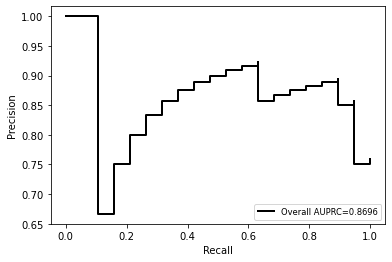

In [54]:
precision, recall, _ = precision_recall_curve(y_test, preds)
lab = 'Overall AUPRC=%.4f' % (auc(recall, precision))

plt.step(recall, precision, label=lab, lw=2, color='black')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower right', fontsize='small')


### Dmatrix try

In [55]:
# converting training data into dmatrix
X_train_boost = xgb.DMatrix(X_train,label = y_train)
X_test_boost = xgb.DMatrix(X_test,label = y_test)

In [56]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [57]:
bst = xgb.train(param, X_train_boost, num_round)

[18:49:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:49:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
preds = bst.predict(X_test_boost)

In [59]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])

In [60]:
from sklearn.metrics import precision_score

print(precision_score(y_test, best_preds, average='macro'))

0.8958333333333333


### Reference 

https://www.ibm.com/cloud/learn/boosting

https://www.analyticsvidhya.com/blog/2020/10/adaboost-and-gradient-boost-comparitive-study-between-2-popular-ensemble-model-techniques/

https://www.edureka.co/blog/boosting-machine-learning/#Types%20Of%20Boosting

https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.DMatrix